In [1]:
from osgeo import gdal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopy.distance as dst
import os
import datetime as dt

In [2]:
def get_fire_grid_bounds(bbox, scale, buffer=0):
    
    # in case I want to add some buffer around the bbox
    if buffer != 0:
        raise NotImplementedError("Fire grid buffer not implemented")
    
    # get the local miles per degree longitude, miles per degree latitude
    miles_per_lon, miles_per_lat = local_miles_per_lon_lat(bbox)
    
    # translate the scale in miles to a (lon, lat) resolution
    lon_res = scale / miles_per_lon
    lat_res = scale / miles_per_lat
    
    # extract the bounds to variables
    lon_min = bbox[0]
    lon_max = bbox[2]
    lat_min = bbox[1]
    lat_max = bbox[3]
    
    # find the length of the axes in the grid we will create
    lon_ticks = (lon_max - lon_min) / lon_res
    lat_ticks = (lat_max - lat_min) / lat_res
    
    # buffer this grid to a whole number of ticks in each dimension
    lon_buffer = (1 - np.mod(lon_ticks, 1))
    if lon_buffer == 1:
        lon_buffer = 0
    lon_buffer = lon_buffer * lon_res
    lat_buffer = (1 - np.mod(lat_ticks, 1))
    if lat_buffer == 1:
        lat_buffer = 0
    lat_buffer = lat_buffer * lat_res
    new_bbox = [lon_min - lon_buffer/2, lat_min - lat_buffer/2, 
                lon_max + lon_buffer/2, lat_max + lat_buffer/2]
    
    # return the resolutions and buffered bounding box
    return lon_res, lat_res, new_bbox
    
    

In [3]:
def local_miles_per_lon_lat(bbox, k=100):
    
    # get lat, lon of center of bbox
    lat = (bbox[3] + bbox[1]) / 2
    lon = (bbox[2] + bbox[0]) / 2
    
    # get points very close to each other that vary a little bit in latitiude direction
    # note: dst.distance uses (lat, lon) convention
    coords1 = (lat - 1 / k, lon)
    coords2 = (lat + 1 / k, lon)
    
    # find miles per degree latitude
    miles_per_lat = dst.distance(coords1, coords2).miles * k / 2
    
    # get points very close to each other that vary a little bit in longitude direction
    coords1 = (lat, lon - 1 / k)
    coords2 = (lat, lon + 1 / k)
    
    # find miles per degree longitude
    miles_per_lon = dst.distance(coords1, coords2).miles * k / 2

    return miles_per_lon, miles_per_lat

In [77]:
def generate_static_data(params_df, lon_res, lat_res, fire_grid_bbox, out_path):
    
    # initialize list of vrt files that will comprise output data set
    vrts = []
    
    # for each static parameter
    for _, row in params_df.iterrows():
        
        # get the path to the data set and open it
        path = row['path']
        ds = gdal.Open(path)
        
        # get the name of the layer, and define a path to a .vrt file we will write
        layer = row['layer']
        vrt_file = f'{out_path}/{layer}.vrt'
        
        # append to list of vrt files
        vrts.append(vrt_file)
        
        # remove .vrt file if it exists (maybe not needed, but GDAL misbehaves sometimes
        # and I think it might have to do with file overwriting)
        if os.path.isfile(vrt_file):
            os.remove(vrt_file)
        
        # write a vrt file to the specified location, which links to the original dataset,
        # clips to the specific region, and reshapes the data to the proper grid
        gdal.Warp(vrt_file, ds, format='VRT', dstSRS='WGS84', xRes=lon_res, yRes=lat_res, 
                     resampleAlg=row['impute'], outputBounds=fire_grid_bbox)
    
    # define output file for all static data, delete if it exists
    out_file = f'{out_path}/static_data.vrt'
    if os.path.isfile(out_file):
        print('here')
        os.remove(out_file)        
    
    # build a .vrt that references all the previous .vrts, one for each layer
    # note: we cannot move any of the referenced files after doing this
    ds = gdal.BuildVRT(out_file, vrts, separate=True, allowProjectionDifference=False)
    return _
    

In [78]:
df = pd.read_csv('data/input/static_data_params.csv')
dropbox_path  = r"C:\Users\mit\Dropbox (MIT)"
df['path'] = dropbox_path + "\\" + df['path']
df

,layer,path,impute
0,evc,C:\Users\mit\Dropbox (MIT)\wildfire_repo\LF201...,near
1,slope,C:\Users\mit\Dropbox (MIT)\wildfire_repo\LF201...,bilinear
2,aspect,C:\Users\mit\Dropbox (MIT)\wildfire_repo\LF201...,near


In [79]:
boundaries = pd.read_pickle('data/clean/merged_boundaries.pkl')

In [80]:
out_path = 'data/clean/fire_histories_2'
scale = 0.6

boundaries['fire_grid_bbox'] = ''

for i, fire in boundaries.iterrows():
    
    bbox = fire['bbox']
    inc_id = fire['INCIDENT_IDENTIFIER']
    fire_out_path = f'{out_path}/{inc_id}'
    
    if not os.path.isdir(fire_out_path):
        os.mkdir(fire_out_path)
    
    lon_res, lat_res, new_bbox = get_fire_grid_bounds(bbox, scale)
    boundaries.at[i, 'fire_grid_bbox'] = tuple(new_bbox)
    _ = generate_static_data(df, lon_res, lat_res, new_bbox, fire_out_path)

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here


In [63]:
for i, fire in boundaries.iterrows():
    
    inc_id = fire['INCIDENT_IDENTIFIER']
    fire_out_path = f'{out_path}/{inc_id}/static_data.vrt'
    try:
        a = gdal.Open(fire_out_path)
        b = a.GetRasterBand(3).ReadAsArray()
        assert b is not None
    except:
        print(inc_id)

In [55]:
fire_out_path

'data/clean/fire_histories_2/11734551/static_data.vrt'

In [46]:
type(boundaries.iloc[0]['geometry'].bounds)

tuple

In [48]:
type(tuple(new_bbox))

tuple

In [24]:
boundaries

,INCIDENT_IDENTIFIER,INCIDENT_NAME,DISCOVERY_DATE,POO,IRWINID,FID,MAP_METHOD,INCIDENT,UNIT_ID,POO_RESP_I,geometry,area,bbox
0,11885771,DOE,8/16/2020 10:48:00 AM,POINT (-122.6733 39.76539),BA03E3D0-EC8B-4346-BD98-FF31E6E09BC7,76341,Digitized Other,DOE,CAMNF,CAMNF,"MULTIPOLYGON (((-122.68532 39.88451, -122.6853...",2.509398e-01,"(-123.27830789099994, 39.43730706400004, -122...."
1,11908866,CREEK,9/4/2020 8:33:00 PM,POINT (-119.2716 37.201),33CBB9DC-6983-4F47-B821-9C9A6CAC381D,76487,Infrared Interpretation,CREEK,CASNF,CASNF,"MULTIPOLYGON (((-119.18146 37.09613, -119.1815...",1.563029e-01,"(-119.48450898299996, 36.989858679000065, -118..."
4,11837476,LIONSHEAD,8/16/2020 10:44:00 PM,POINT (-121.6788889 44.7225),DC9FEF19-D7AB-4500-B319-ACBA1DB2776A,36121,Infrared Interpretation,Lionshead,ORWSA,ORWSA,"MULTIPOLYGON (((-122.09022 44.64935, -122.0903...",9.409738e-02,"(-122.16333494099996, 44.60502535900008, -121...."
5,11856938,CAMERON PEAK,8/13/2020 2:48:00 PM,POINT (-105.8792 40.6087),53741A13-D269-4CD5-AF91-02E094B944DA,43855,Infrared Interpretation,Cameron Peak,COARF,COARF,"MULTIPOLYGON (((-105.88333 40.54598, -105.8837...",8.995675e-02,"(-105.90370655599997, 40.46133897900006, -105...."
6,11887587,BEACHIE CREEK,8/16/2020 1:18:00 PM,POINT (-122.188 44.82111),5DCC1365-150C-4EE3-9D94-627D92C141D8,36119,Other,Beachie Creek,ORWIF,ORWIF,"MULTIPOLYGON (((-122.59762 45.02286, -122.5975...",8.915226e-02,"(-122.67143949499996, 44.69332474400005, -122...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,11905673,BIRCH CREEK,9/14/2020 1:22:00 PM,POINT (-118.808 45.28965),FB2D76F2-CDDE-4877-8FF2-F8278B0BEEA9,36094,Other,Birch Creek,ORUMF,ORUMF,"POLYGON ((-118.80739 45.28935, -118.80792 45.2...",1.483787e-06,"(-118.80896700799997, 45.28931984400003, -118...."
883,11723586,LITTLE CHENA - SOUTH,6/13/2020 6:17:42 PM,POINT (-146.893033 64.9342),DB7F5EE3-C497-42E1-B0ED-7729E297F8E1,76931,Mixed Methods,Little Chena - South,None,AKFAS,"POLYGON ((-146.89306 64.93455, -146.89301 64.9...",1.076467e-06,"(-146.89438105899998, 64.93389502800005, -146...."
909,11707715,TL SILENT,5/15/2020 12:49:46 PM,POINT (-85.82986 33.43257),EF791031-9E2A-469A-998D-99CF17D55BDC,38193,Unknown,TL Silent,ALALF,ALALF,"POLYGON ((-85.83001 33.43222, -85.82998 33.432...",6.867999e-07,"(-85.83108999899997, 33.43186000000003, -85.82..."
949,11702913,SC BOBO,5/13/2020 3:56:00 PM,POINT (-85.62437 33.61986),87D96999-D091-49D7-ACA0-E34FAF96E078,38196,Unknown,SC Bobo,ALALF,ALALF,"POLYGON ((-85.62496 33.62012, -85.62507 33.620...",2.776900e-07,"(-85.62574978899994, 33.62002513700003, -85.62..."


In [20]:
a = gdal.Open('static_data.vrt')

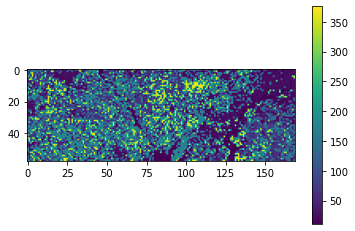

In [21]:
b = a.GetRasterBand(1).ReadAsArray()

plt.imshow(b)
plt.colorbar()

In [382]:
def extract_hrrr(time, codes, save_dir, fxx=0):
    
    # get HRRR forecast initialization at this time (should be real-time weather)
    H = Herbie(time, model='hrrr', product='sfc', fxx=fxx, save_dir=save_dir)
    
    herbie_regex = '|'.join(codes)
    
    print(dt.datetime.now())
    original_out = sys.stdout
    new_stdout = io.StringIO()
    sys.stdout = new_stdout
    
    H.download(herbie_regex)
    
    output = new_stdout.getvalue()
    sys.stdout = original_out
    print(dt.datetime.now())
    
    direc = output.split('Created directory:')[1].split('[')[1].split(']')[0]
    l = output.split('GRIB_message')[1:]
    lookup = {code : [i for i, string in enumerate(l) if code in string] for code in list(fields['download_code'])}

    lens = list(set([len(lookup[key]) for key in lookup]))
    if lens != [1]:
        raise ValueError('Merge ambiguity for HRRR bands on download')
    
    band_lookup = {i:lookup[i][0]+1 for i in lookup}
    
    return direc, band_lookup

In [404]:
a = list(fields['download_code'])
extract_hrrr('2017-08-29 12:00', a, 'data/raw')

🏋🏻‍♂️ Found 2017-Aug-29 12:00 UTC F01 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       
2022-01-14 16:13:03.979357
2022-01-14 16:13:08.186684


('C:\\Users\\mit\\Documents\\GitHub\\wildfires\\data\\raw\\hrrr\\20170829',
 {'TMP:2 m': 3,
  'SPFH:2 m': 4,
  'UGRD:10 m': 5,
  'VGRD:10 m': 6,
  'LTNG': 1,
  'PRATE': 7,
  'PRES:surface': 2})

In [405]:
file = r"C:\Users\mit\Documents\GitHub\wildfires\data\raw\hrrr\20170829\hrrr.t12z.wrfsfcf01.grib2.subset_42-45-54-56-59-60-63"

In [407]:
ds = gdal.Open(file)

bbox = [-110, 25, -75, 50]
hrrr = warp(ds, *bbox, *local_miles_per_lon_lat(bbox), 1, 'test.vrt')

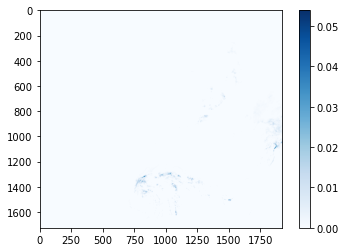

In [417]:
plt.imshow(hrrr.GetRasterBand(7).ReadAsArray(), cmap='Blues')
plt.colorbar()

In [252]:
b.RasterCount

173

In [253]:
comments = {i:b.GetRasterBand(i).GetMetadata()['GRIB_COMMENT'] for i in range(1, b.RasterCount+1)}
comments 

{1: 'Maximum / Composite radar reflectivity [dB]',
 2: 'Echo Top [m]',
 3: '(prodType 0, cat 16, subcat 201) [-]',
 4: 'Vertically-integrated liquid [kg/m]',
 5: 'Visibility [m]',
 6: 'Derived radar reflectivity [dB]',
 7: 'Derived radar reflectivity [dB]',
 8: 'Derived radar reflectivity [dB]',
 9: 'Wind speed (gust) [m/s]',
 10: 'u-component of wind [m/s]',
 11: 'v-component of wind [m/s]',
 12: 'u-component of wind [m/s]',
 13: 'v-component of wind [m/s]',
 14: 'Geopotential height [gpm]',
 15: 'Temperature [C]',
 16: 'Dew point temperature [C]',
 17: 'u-component of wind [m/s]',
 18: 'v-component of wind [m/s]',
 19: 'Geopotential height [gpm]',
 20: 'Temperature [C]',
 21: 'Dew point temperature [C]',
 22: 'Verical velocity (geometric) [m/s]',
 23: 'u-component of wind [m/s]',
 24: 'v-component of wind [m/s]',
 25: 'Geopotential height [gpm]',
 26: 'Temperature [C]',
 27: 'Dew point temperature [C]',
 28: 'u-component of wind [m/s]',
 29: 'v-component of wind [m/s]',
 30: 'Tempera

In [250]:
{i:b.GetRasterBand(i).GetMetadata() for i in range(1, b.RasterCount+1)}

{1: {'GRIB_COMMENT': 'Maximum / Composite radar reflectivity [dB]',
  'GRIB_DISCIPLINE': '0(Meteorological)',
  'GRIB_ELEMENT': 'REFC',
  'GRIB_FORECAST_SECONDS': '21600 sec',
  'GRIB_IDS': 'CENTER=7(US-NCEP) SUBCENTER=0 MASTER_TABLE=2 LOCAL_TABLE=1 SIGNF_REF_TIME=1(Start_of_Forecast) REF_TIME=2019-01-01T12:00:00Z PROD_STATUS=0(Operational) TYPE=1(Forecast)',
  'GRIB_PDS_PDTN': '0',
  'GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES': '16 196 2 0 83 0 0 1 6 10 0 0 255 0 0',
  'GRIB_PDS_TEMPLATE_NUMBERS': '16 196 2 0 83 0 0 0 1 0 0 0 6 10 0 0 0 0 0 255 0 0 0 0 0',
  'GRIB_REF_TIME': '  1546344000 sec UTC',
  'GRIB_SHORT_NAME': '0-EATM',
  'GRIB_UNIT': '[dB]',
  'GRIB_VALID_TIME': '  1546365600 sec UTC'},
 2: {'GRIB_COMMENT': 'Echo Top [m]',
  'GRIB_DISCIPLINE': '0(Meteorological)',
  'GRIB_ELEMENT': 'RETOP',
  'GRIB_FORECAST_SECONDS': '21600 sec',
  'GRIB_IDS': 'CENTER=7(US-NCEP) SUBCENTER=0 MASTER_TABLE=2 LOCAL_TABLE=1 SIGNF_REF_TIME=1(Start_of_Forecast) REF_TIME=2019-01-01T12:00:00Z PROD_STATUS=0(

In [249]:
short_names = {i:b.GetRasterBand(i).GetMetadata()['GRIB_SHORT_NAME'] for i in range(1, b.RasterCount+1)}
short_names 

{1: '0-EATM',
 2: '0-CTL',
 3: '0-EATM',
 4: '0-SFC',
 5: '1000-HTGL',
 6: '4000-HTGL',
 7: '263-TMPL',
 8: '0-SFC',
 9: '25000-ISBL',
 10: '25000-ISBL',
 11: '30000-ISBL',
 12: '30000-ISBL',
 13: '50000-ISBL',
 14: '50000-ISBL',
 15: '50000-ISBL',
 16: '50000-ISBL',
 17: '50000-ISBL',
 18: '70000-ISBL',
 19: '70000-ISBL',
 20: '70000-ISBL',
 21: '70000-ISBL',
 22: '70000-ISBL',
 23: '85000-ISBL',
 24: '85000-ISBL',
 25: '85000-ISBL',
 26: '85000-ISBL',
 27: '85000-ISBL',
 28: '92500-ISBL',
 29: '92500-ISBL',
 30: '92500-ISBL',
 31: '92500-ISBL',
 32: '100000-ISBL',
 33: '100000-ISBL',
 34: '100000-ISBL',
 35: '100000-ISBL',
 36: '10000-100000-SPDL',
 37: '10000-100000-SPDL',
 38: '0.5-0.8-SIGL',
 39: '0-MSL',
 40: '100000-ISBL',
 41: '1000-HTGL',
 42: '263-TMPL',
 43: '5000-2000-HTGL',
 44: '5000-2000-HTGL',
 45: '2000-0-HTGL',
 46: '2000-0-HTGL',
 47: '3000-0-HTGL',
 48: '3000-0-HTGL',
 49: '2000-0-HTGL',
 50: '1000-0-HTGL',
 51: '0-EATM',
 52: '0.1-SIGL',
 53: '0-EATM',
 54: '0-EATM

In [418]:
boundaries = pd.read_pickle('data/clean/merged_boundaries.pkl')
fire_pixels_lookup = pd.read_csv('data/clean/fire_pixels_lookup.csv')
fire_pixels = pd.read_csv('data/clean/viirs.csv')

In [419]:
fire_pixels = pd.merge(fire_pixels, fire_pixels_lookup, on='pixel_id', how='right', validate='1:1')
fire_pixels = fire_pixels[fire_pixels['INCIDENT_IDENTIFIER'].notna()]
fire_pixels['INCIDENT_IDENTIFIER'] = fire_pixels['INCIDENT_IDENTIFIER'].astype(str)

In [420]:
fire_pixels['INCIDENT_IDENTIFIER'].value_counts()

11837476    16003
11926606     9951
11917747     9919
11856938     9773
11930517     7974
            ...  
11788276        1
11961863        1
11886442        1
11978937        1
11715569        1
Name: INCIDENT_IDENTIFIER, Length: 249, dtype: int64

In [467]:
inc_id = '11837476'
ex_fire = fire_pixels[fire_pixels['INCIDENT_IDENTIFIER'] == inc_id]
ex_fire[['LONGITUDE', 'LATITUDE']]

,LONGITUDE,LATITUDE
0,-121.681061,44.724167
1,-121.677238,44.724003
2,-121.626709,44.775635
3,-121.618553,44.775272
4,-121.677864,44.721909
...,...,...
15998,-122.081680,44.853119
15999,-122.097748,44.853817
16000,-122.098770,44.857208
16001,-122.076706,44.854008


In [471]:
fire_bbox = boundaries.set_index('INCIDENT_IDENTIFIER').loc[inc_id, 'bbox']

(-122.16333494099996,
 44.60502535900008,
 -121.51630414599998,
 44.947391949000064)

In [483]:
z, y, x = np.histogram2d(ex_fire['LATITUDE'], ex_fire['LONGITUDE'], bins=100, range=[[44.60, 44.95], [-122.17, -121.51]])
z = np.flip(z, axis=0)

In [484]:
x, y

(array([-122.17  , -122.1634, -122.1568, -122.1502, -122.1436, -122.137 ,
        -122.1304, -122.1238, -122.1172, -122.1106, -122.104 , -122.0974,
        -122.0908, -122.0842, -122.0776, -122.071 , -122.0644, -122.0578,
        -122.0512, -122.0446, -122.038 , -122.0314, -122.0248, -122.0182,
        -122.0116, -122.005 , -121.9984, -121.9918, -121.9852, -121.9786,
        -121.972 , -121.9654, -121.9588, -121.9522, -121.9456, -121.939 ,
        -121.9324, -121.9258, -121.9192, -121.9126, -121.906 , -121.8994,
        -121.8928, -121.8862, -121.8796, -121.873 , -121.8664, -121.8598,
        -121.8532, -121.8466, -121.84  , -121.8334, -121.8268, -121.8202,
        -121.8136, -121.807 , -121.8004, -121.7938, -121.7872, -121.7806,
        -121.774 , -121.7674, -121.7608, -121.7542, -121.7476, -121.741 ,
        -121.7344, -121.7278, -121.7212, -121.7146, -121.708 , -121.7014,
        -121.6948, -121.6882, -121.6816, -121.675 , -121.6684, -121.6618,
        -121.6552, -121.6486, -121.642

In [489]:
np.unique(z, return_counts=True)

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 20., 22., 25.]),
 array([5567,  993,  925,  739,  541,  427,  247,  168,  132,   73,   61,
          37,   31,   16,   13,   11,   12,    2,    2,    1,    1,    1],
       dtype=int64))

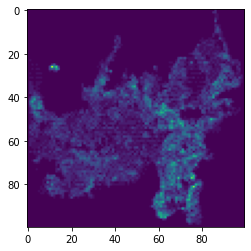

In [486]:
plt.imshow(z)

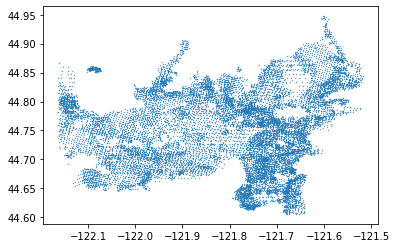

In [427]:
plt.scatter(ex_fire['LONGITUDE'], ex_fire['LATITUDE'], s=0.1)